<a href="https://colab.research.google.com/github/VPonomarev42/LearningRep/blob/stats_miniproject3/stats_miniproject_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from scipy.stats import iqr
from scipy.stats import shapiro
from scipy.stats import ttest_ind
%matplotlib inline

# **Задание**
Представьте, что вы работаете аналитиком в очень крупной компании по доставке пиццы над приложением для курьеров (да, обычно в таких компаниях есть приложение для курьеров и отдельно приложение для потребителей).

У вас есть несколько ресторанов в разных частях города и целый штат курьеров. Но есть одна проблема, к вечеру скорость доставки падает из-за того, что курьеры уходят домой после рабочего дня, а количество заказов лишь растет. Это приводит к тому, что в момент пересмены наша доставка очень сильно проседает в эффективности. 

Наши data scientist-ы придумали новый алгоритм, который позволяет курьерам запланировать свои последние заказы перед окончанием рабочего дня так, чтобы их маршрут доставки совпадал с маршрутом до дома. То есть, чтобы курьеры доставляли последние свои заказы за день как бы "по пути" домой. 

Вы вместе с командой решили раскатить A/B тест на две равные группы курьеров. Часть курьеров использует старый алгоритм без опции "по пути", другие видят в своем приложении эту опцию и могут ее выбрать. Ваша задача – проанализировать данные эксперимента и помочь бизнесу принять решение о раскатке новой фичи на всех курьеров.



**Описание данных**
* order_id - id заказа
* delivery_time - время доставки в минутах 
* district - район доставки
* experiment_group - экспериментальная группа







---

---





1.Загрузим данные, построим графики

In [ ]:
sns.set(rc={'figure.figsize':(10,5)}, style='whitegrid')

In [ ]:
data = pd.read_csv('https://stepik.org/media/attachments/lesson/385916/experiment_lesson_4.csv')
data.head()

,order_id,delivery_time,district,experiment_group
0,3159,44.0,Purlieus,control
1,10426,51.0,Purlieus,control
2,9155,46.0,Purlieus,control
3,10699,34.0,Purlieus,control
4,10061,43.0,Purlieus,control


In [ ]:
data.shape

(20196, 4)

In [ ]:
data.isna().value_counts()

order_id  delivery_time  district  experiment_group
False     False          False     False               20196
dtype: int64

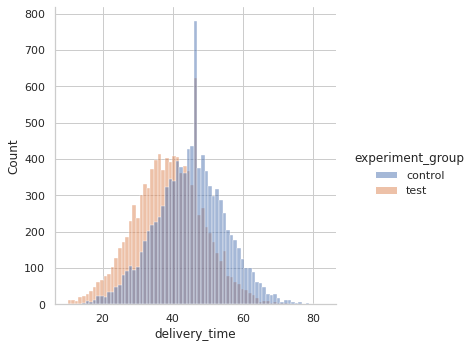

In [ ]:
sns.displot(data=data, x='delivery_time', hue='experiment_group')

In [ ]:
test_data = data[data['experiment_group'] == 'test']
control_data = data[data['experiment_group'] == 'control']

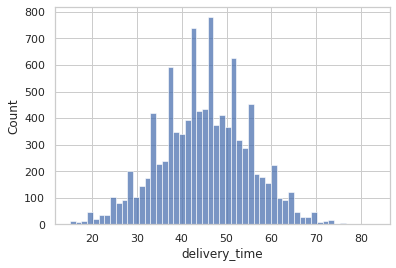

In [ ]:
sns.histplot(data=control_data.delivery_time)

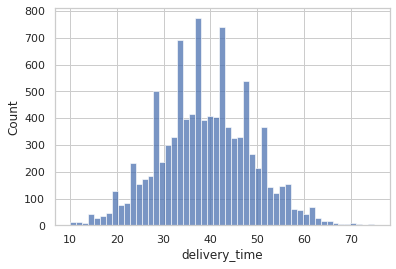

In [ ]:
sns.histplot(data=test_data.delivery_time)

2. Посмотрим количество данных в каждой группе и посчитаем разность

In [ ]:
data.experiment_group.value_counts()

test       10104
control    10092
Name: experiment_group, dtype: int64

In [ ]:
data.experiment_group.value_counts()[0] - data.experiment_group.value_counts()[1]

12

3.Проверим данные экспериментов на нормальность. Для этого выделим подвыборки по 1000 случайных элементов и применим критерий Шапиро-Вилка 

In [ ]:
test_subgroup = test_data['delivery_time'].sample(1000, random_state=17)
control_subgroup = control_data['delivery_time'].sample(1000, random_state=17)


In [ ]:
shapiro(test_subgroup)

(0.9975479245185852, 0.14013493061065674)

In [ ]:
shapiro(control_subgroup)

(0.9974725842475891, 0.12411931157112122)

Как видим, p-value в обоих подвыборках значительно выше 0.05, поэтому мы не можем отклонить нулевую гипотезу о том, что наши распределения не являются нормальными

In [ ]:
np.round(np.std(test_data.delivery_time),2)

9.88

In [ ]:
np.round(np.std(control_data.delivery_time),2)

9.99

4.Пришло время сравнить средние в тесте и контроле. Для этого исползуем t-test для двух независимых переменных

In [ ]:
ttest = ttest_ind(test_data.delivery_time, control_data.delivery_time)
ttest.pvalue

0.0

Видим, что p-value значительно меньше 0.05, следовательно мы можем отклонить нулевую гипотезу о том, что средние в двух выборках не имеют различий. 

Отклонив нулевую гипотезу мы принимаем альтернативную гипотезу о том, что различия между выборками значимые и проведенный эксперимент можно назвать успешным

In [ ]:
control_data.delivery_time.mean()

45.065101070154576

In [ ]:
test_data.delivery_time.mean()

39.04681314330958

In [ ]:
 (test_data.delivery_time.mean() - control_data.delivery_time.mean()) /  control_data.delivery_time.mean() * 100

-13.354653121660812

Среднее время доставки после внедрения нового алгоритма уменьшилось на 13.35%